In [1]:
%matplotlib inline

import sys, os
sys.path.append("/home/daniil/repos/pytorch-segmentation-detection/")
sys.path.insert(0, '/home/daniil/repos/pytorch-segmentation-detection/vision/')

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated
from pytorch_segmentation_detection.datasets.endovis_instrument_2017 import get_sorted_by_name_image_names
from pytorch_segmentation_detection.transforms import pad_to_size

import numpy as np


fcn = resnet_dilated.Resnet18_8s(num_classes=2)
fcn.load_state_dict(torch.load('resnet_18_8s_best.pth'))
fcn.cuda()
fcn.eval()

test_dataset_folder_template = '/home/daniil/projects/endovis/dataset/test/instrument_dataset_{}/left_frames/'
submission_dataset_folder_template = '/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_{}/'

valid_transform = transforms.Compose(
                [
                    transforms.CenterCrop((1024, 1280)),
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])


/home/daniil/repos/anaconda2/lib/python2.7/site-packages/torch/nn/modules/module.py:360: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


In [2]:

for dataset_number in xrange(1, 11):

    current_dataset_folder = test_dataset_folder_template.format(dataset_number)
    current_submission_folder = submission_dataset_folder_template.format(dataset_number)

    if not os.path.exists(current_submission_folder):
        os.makedirs(current_submission_folder)

    current_dataset_sorted_image_names = get_sorted_by_name_image_names(current_dataset_folder)

    for current_image_path in current_dataset_sorted_image_names:

        filename = os.path.basename(current_image_path)
        current_submission_image_path = os.path.join(current_submission_folder, filename)

        img_not_preprocessed = Image.open(current_image_path).convert('RGB')

        img = valid_transform(img_not_preprocessed)
        img = img.unsqueeze(0)
        img = Variable(img.cuda())

        res = fcn(img)
        _, tmp = res.squeeze(0).max(0)
        segmentation = tmp.data.cpu().numpy().squeeze()

        segmentation[segmentation > 0 ] = 255
        segmentation = np.expand_dims(segmentation, axis=2).repeat(3, axis=2)
        
        
        tmp = Image.fromarray(segmentation.astype(np.uint8))
        padded_back = pad_to_size(tmp, size=img_not_preprocessed.size)
        
        img_np = np.asarray(img_not_preprocessed)
        annotation_np = np.asarray(padded_back)
        
        double_view = np.zeros((1080, 1920*2, 3), np.uint8)
        double_view[:1080, :1920, :] = img_np
        double_view[:1080, 1920:, :] = annotation_np
        
        final = Image.fromarray(double_view)
        
        final.save(current_submission_image_path)

        print(current_submission_image_path)
    
    

/home/daniil/repos/anaconda2/lib/python2.7/site-packages/torch/nn/functional.py:961: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame225.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame226.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame227.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame228.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame229.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame230.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame231.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame232.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame233.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame234.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_1/frame235.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame244.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame245.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame246.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame247.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame248.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame249.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame250.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame251.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame252.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame253.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_2/frame254.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame263.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame264.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame265.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame266.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame267.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame268.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame269.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame270.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame271.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame272.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_3/frame273.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame282.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame283.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame284.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame285.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame286.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame287.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame288.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame289.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame290.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame291.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_4/frame292.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame226.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame227.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame228.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame229.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame230.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame231.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame232.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame233.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame234.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame235.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_6/frame236.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame245.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame246.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame247.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame248.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame249.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame250.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame251.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame252.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame253.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame254.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_7/frame255.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame264.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame265.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame266.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame267.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame268.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame269.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame270.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame271.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame272.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame273.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_8/frame274.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame058.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame059.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame060.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame061.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame062.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame063.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame064.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame065.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame066.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame067.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame068.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame152.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame153.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame154.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame155.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame156.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame157.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame158.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame159.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame160.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame161.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame162.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame246.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame247.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame248.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame249.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame250.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame251.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame252.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame253.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame254.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame255.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_9/frame256.png
/home/daniil/projects/endovis/da

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame039.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame040.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame041.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame042.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame043.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame044.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame045.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame046.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame047.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame048.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame049.png
/home/daniil/projects

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame132.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame133.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame134.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame135.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame136.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame137.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame138.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame139.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame140.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame141.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame142.png
/home/daniil/projects

/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame225.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame226.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame227.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame228.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame229.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame230.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame231.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame232.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame233.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame234.png
/home/daniil/projects/endovis/dataset/test/submission/instrument_dataset_10/frame235.png
/home/daniil/projects

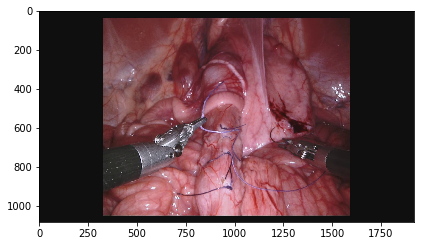

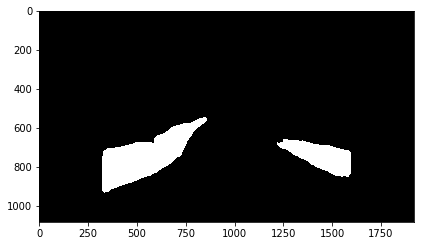

In [13]:
import skimage.io as io

img_np = np.asarray(img_not_preprocessed)
annotation_np = np.asarray(padded_back)

io.imshow(img_np)
io.show()

io.imshow(annotation_np)
io.show()

In [14]:
print(img_np.shape)

print(annotation_np.shape)

(1080, 1920, 3)
(1080, 1920, 3)


In [18]:
double_view = np.zeros((1080, 1920*2, 3), np.uint8)

double_view[:1080, :1920, :] = img_np
double_view[:1080, 1920:, :] = annotation_np

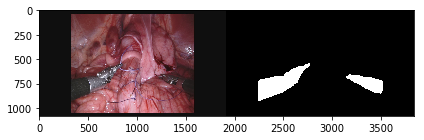

In [19]:
io.imshow(double_view)

In [12]:
io.imshow(np.asarray(padded_back))

AttributeError: 'Image' object has no attribute 'shape'